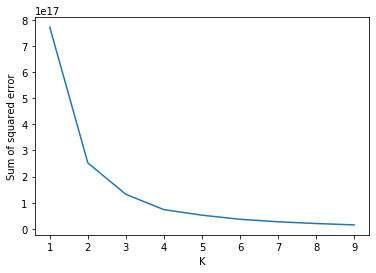

In [25]:
import matplotlib.pyplot as plt
df = pd.read_csv("../data_set_535_ano_sankee_six.csv")
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Removing outliers by clustering
# k = 4

df = pd.read_csv("../data_set_535_ano_sankee_six.csv")

km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(df)
df['cluster'] = y_predicted
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

print('cluster1', df1.shape)
print('cluster2', df2.shape)
print('cluster3', df3.shape)
print('cluster4', df4.shape)

lr = LinearRegression()
rf = RandomForestRegressor()

X1 = df1.drop('price', axis = 1).drop('cluster', axis = 1)
y1 = df1['price']

X2 = df2.drop('price', axis = 1).drop('cluster', axis = 1)
y2 = df2['price']

X3 = df3.drop('price', axis = 1).drop('cluster', axis = 1)
y3 = df3['price']

X4 = df4.drop('price', axis = 1).drop('cluster', axis = 1)
y4 = df4['price']

dfc = df1.drop('cluster', axis=1)
dfc.to_csv("house_data_first_semister_clustered.csv", index=False)

scores_cluster1_l = cross_val_score(rf, X1, y1, cv=5)
scores_cluster2_l = cross_val_score(rf, X2, y2, cv = 5)
scores_cluster3_l = cross_val_score(rf, X3, y3, cv = 5)
scores_cluster4_l = cross_val_score(rf, X4, y4, cv = 5)

print('cluster1_l:', np.mean(scores_cluster1_l))
print('cluster2_l:', np.mean(scores_cluster2_l))
print('cluster3_l:', np.mean(scores_cluster3_l))
print('cluster4_l:', np.mean(scores_cluster4_l))

cluster1 (412, 7)
cluster2 (21, 7)
cluster3 (7, 7)
cluster4 (95, 7)


c:\users\ano\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ano\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ano\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


cluster1_l: 0.612999356193739
cluster2_l: -0.6092415625242438
cluster3_l: nan
cluster4_l: 0.03066539756469957


In [1]:
#removed outliers by clustering
# instances: 412, features: 6

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

df = pd.read_csv("house_data_first_semister_clustered.csv")
print(df.shape)

X = df.drop('price', axis = 1)
y = df['price']

model_params = {
    'lr': {
        'model': LinearRegression(),
        'params': {}
    },
    'rf': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 20, 50, 70, 100, 150],
            'max_features': [1, 2, 3, 4, 5],
            'max_depth': [1, 2, 5, 10, 15, 20, 25]
        }
    },
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [5, 10, 15, 25, 30, 50, 100]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
print(scores)    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df.to_csv('first_semister_result_outliers_clustring_method.csv', index = False)
df

(412, 6)
[{'model': 'lr', 'best_score': 0.4277174332228858, 'best_params': {}}, {'model': 'rf', 'best_score': 0.6647806164876564, 'best_params': {'max_depth': 25, 'max_features': 1, 'n_estimators': 100}}, {'model': 'knn', 'best_score': 0.5556847295182271, 'best_params': {'n_neighbors': 50}}]


,model,best_score,best_params
0,lr,0.427717,{}
1,rf,0.664781,"{'max_depth': 25, 'max_features': 1, 'n_estima..."
2,knn,0.555685,{'n_neighbors': 50}


In [11]:
df = pd.read_csv("house_data_first_semister_clustered.csv")


X = df.drop('price', axis = 1)
y = df['price']

score_lr = cross_val_score(LinearRegression(), X, y, cv=5)
score_rf = cross_val_score(RandomForestRegressor(max_depth=25, max_features=1, n_estimators=100), X, y, cv=5)
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors=50), X, y, cv=5)

print('LR: ', np.mean(score_lr))
print('RF: ', np.mean(score_rf))
print('KNN: ', np.mean(score_knn))

LR:  0.4277174332228858
RF:  0.6551594942787263
KNN:  0.5556847295182271
